<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

we will see how to use logistic regression for multiclass classification. 

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

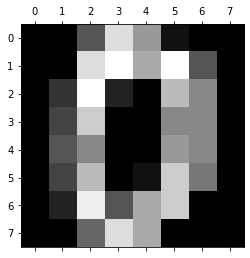

In [5]:
plt.gray() 
plt.matshow(digits.images[0]) 

<Figure size 432x288 with 0 Axes>

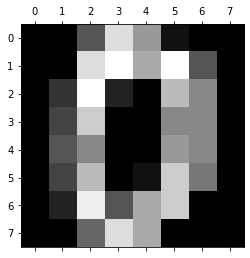

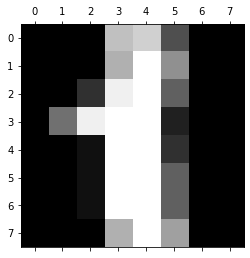

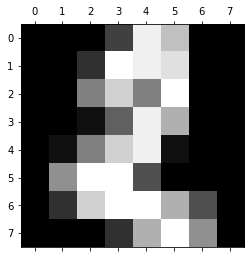

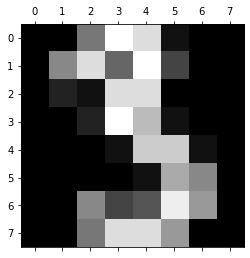

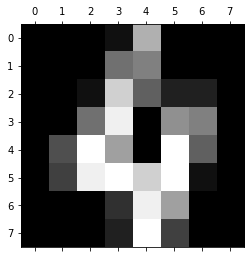

In [6]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

<h3 style='color:blue'>Create and train logistic regression model</h3>

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [24]:
len(X_train)

1437

In [25]:
len(X_test)

360

In [26]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [27]:
model.score(X_test, y_test)

0.9666666666666667

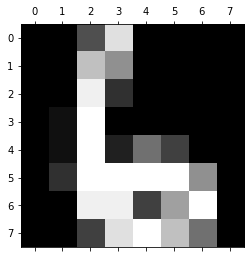

In [29]:
plt.matshow(digits.images[67]) 

In [30]:
digits.target[67]

6

In [32]:
model.predict([digits.data[67]])

array([6])

In [33]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [35]:
y_predicted = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0, 32,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  1],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

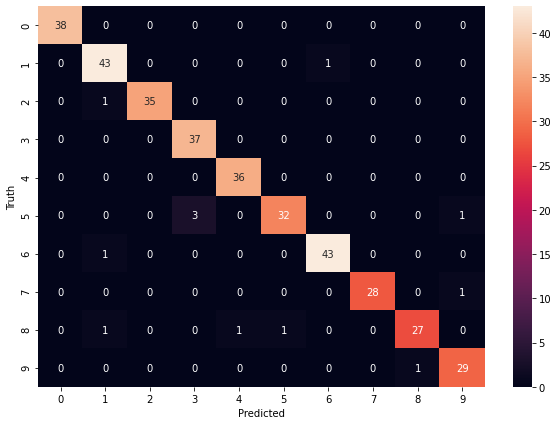

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')